In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'civic-boulder-370718' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=civic-boulder-370718:US:bquxjob_6c9f476_18c2e7bd8ee)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2ba5d95c_18c3039d4e8') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
  DISTINCT driver_id,
  driver_onboard_date,
  MAX(DATE(timestamp)) OVER (PARTITION BY driver_id) AS last_active_date,
  SUM(ride_distince_in_miles) OVER (PARTITION BY driver_id) AS total_miles,
  SUM(ride_duration_in_mins) OVER (PARTITION BY driver_id) AS total_mins,
  DATE_DIFF(DATE("2016-06-27"),DATE(driver_onboard_date),day) AS days_since_onboarding,
  active_days,
  total_revenue,
  revenue_per_day
FROM
  `civic-boulder-370718.Lyft_Case.final_table_with_revenue`


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2ba5d95c_18c3039d4e8') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,driver_id,driver_onboard_date,last_active_date,total_miles,total_mins,days_since_onboarding,active_days,total_revenue,revenue_per_day
0,e1b7e1ea030de78f88501a832cb007b2,2016-05-04 00:00:00+00:00,2016-06-26,5203.133954,16199.833333,54,53,3138.769118,59.222059
1,83a0efd007f4db8f0b7db5753d80fd87,2016-04-14 00:00:00+00:00,2016-05-03,545.917919,2126.500000,74,19,364.422736,19.180144
2,ba78525b3444a3714174f4734720996a,2016-04-25 00:00:00+00:00,2016-06-26,6252.200827,16795.583333,63,62,3609.953218,58.225052
3,fe35f74209d1056dd315ddb17681203d,2016-04-05 00:00:00+00:00,2016-06-25,7070.919256,29331.166667,83,81,5153.885079,63.628211
4,175540c364f94b6adbc0ce3541a3254a,2016-05-14 00:00:00+00:00,2016-06-25,1598.343303,3596.416667,44,42,889.492696,21.178398
...,...,...,...,...,...,...,...,...,...
832,844d41532242b64d8f19774b6b7f1c82,2016-04-18 00:00:00+00:00,2016-06-21,5739.311883,21497.500000,70,64,4042.254321,63.160224
833,6c9d732cd0560af6e8939ac97bdd78d2,2016-03-30 00:00:00+00:00,2016-06-26,8678.542735,28113.250000,89,88,5902.606362,67.075072
834,72ca99bb6667024a23e1f68904b06fd0,2016-03-28 00:00:00+00:00,2016-06-26,10015.515647,30260.000000,91,90,5456.635116,60.629279
835,220d2d2a94c58c0f7ee7cb1864d5f0c5,2016-04-26 00:00:00+00:00,2016-06-26,8038.598956,24932.666667,62,61,5197.744811,85.208931


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,total_miles,total_mins,days_since_onboarding,active_days,total_revenue,revenue_per_day
count,837.000000,837.000000,837.0,837.0,837.000000,837.000000
mean,4748.873954,15770.215552,68.985663,55.105137,3046.719716,55.092776
std,3914.427180,12834.110969,14.063162,21.726518,2473.993861,42.107598
min,30.742330,142.666667,43.0,1.0,25.691305,0.570382
25%,1053.267341,3196.916667,58.0,42.0,628.586675,19.225604
50%,4509.255172,15825.500000,70.0,57.0,3032.228402,48.989803
75%,7182.570304,24008.083333,82.0,73.0,4568.841818,77.984876
max,20592.859418,64983.083333,91.0,90.0,12641.278258,424.439822


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
results['driver_onboard_date'] = pd.to_datetime(results['driver_onboard_date'])
results['last_active_date'] = pd.to_datetime(results['last_active_date'])


In [ ]:
# Define churn
current_date = results['last_active_date'].max()
results['is_churned'] = results['last_active_date'].apply(lambda x: 1 if (current_date - x).days > 14 else 0)


# Calculate churn rate
churn_rate = results['is_churned'].mean()
print(f"Churn Rate: {churn_rate}")


Churn Rate: 0.3070489844683393


<ipython-input-25-c3324c7c92ea>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(results.corr(), annot=True, cmap='coolwarm')


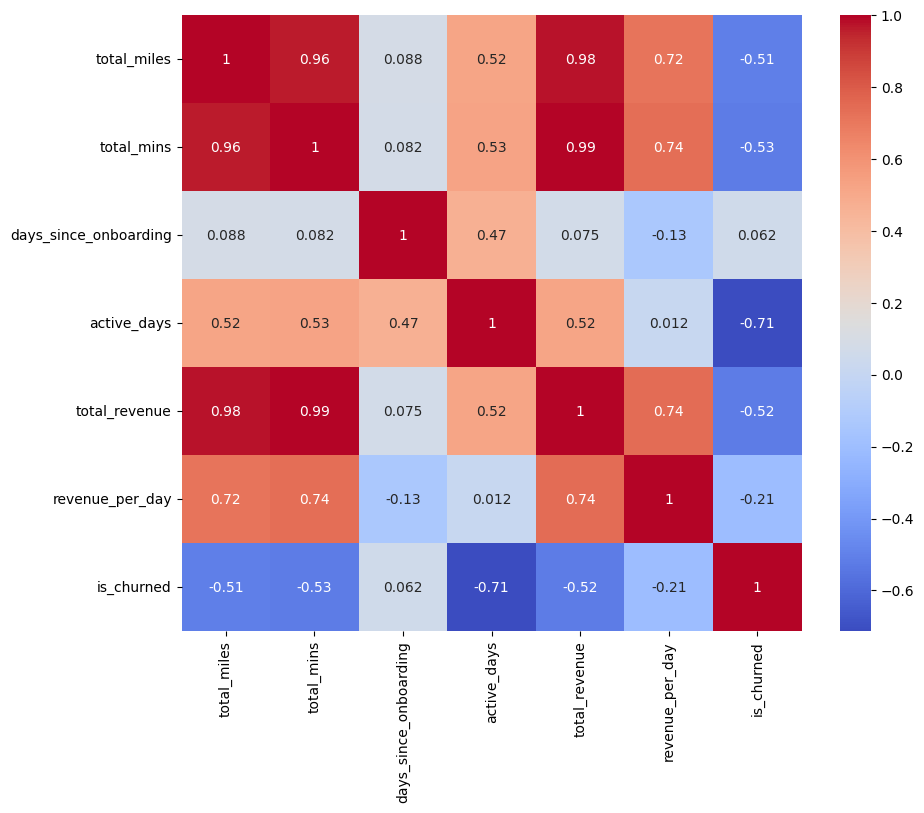

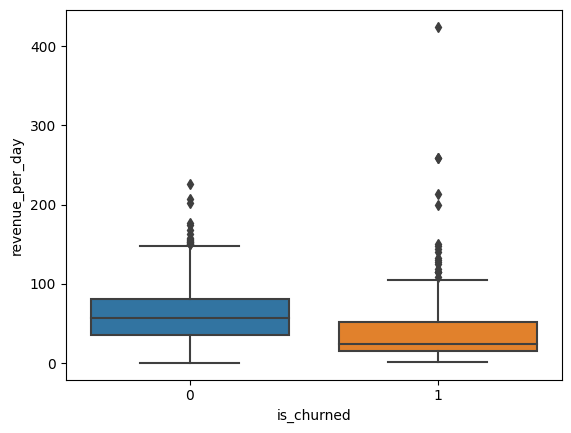

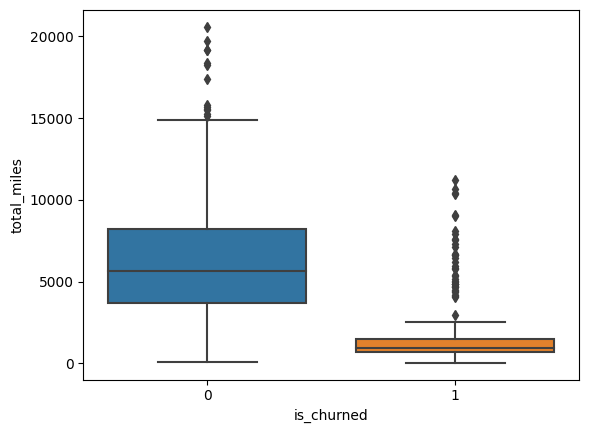

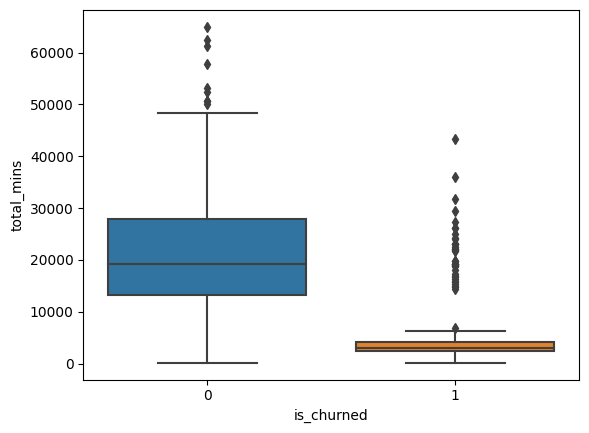

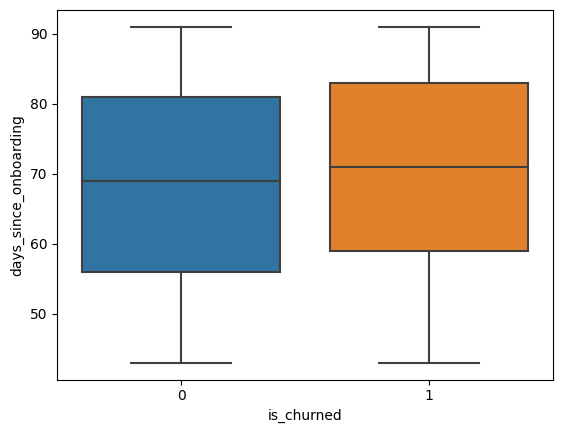

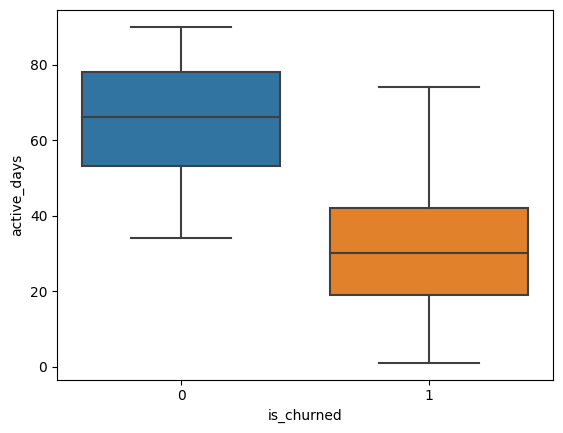

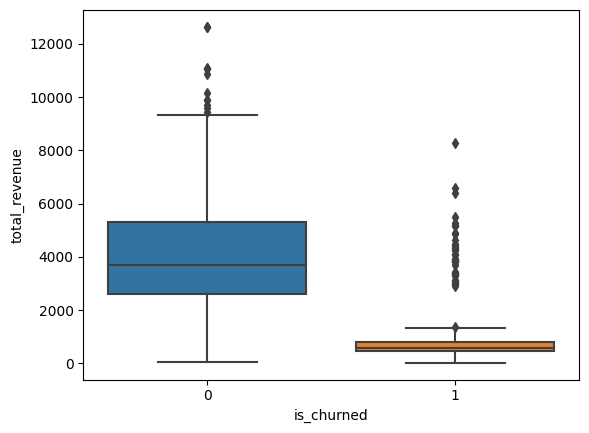

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(results.corr(), annot=True, cmap='coolwarm')
plt.show()

# Revenue per day vs churn
sns.boxplot(x='is_churned', y='revenue_per_day', data=results)
plt.show()

# Total Miles vs churn
sns.boxplot(x='is_churned', y='total_miles', data=results)
plt.show()

# Total Mins vs churn
sns.boxplot(x='is_churned', y='total_mins', data=results)
plt.show()

# Days Since Onboarding vs churn
sns.boxplot(x='is_churned', y='days_since_onboarding', data=results)
plt.show()

# Active Days vs churn
sns.boxplot(x='is_churned', y='active_days', data=results)
plt.show()

# Total Revenue vs churn
sns.boxplot(x='is_churned', y='total_revenue', data=results)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecting features and target
X = results[['total_miles', 'total_mins', 'active_days', 'total_revenue', 'revenue_per_day', 'days_since_onboarding']]
y = results['is_churned']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       191
           1       0.98      0.82      0.89        61

    accuracy                           0.95       252
   macro avg       0.96      0.91      0.93       252
weighted avg       0.95      0.95      0.95       252



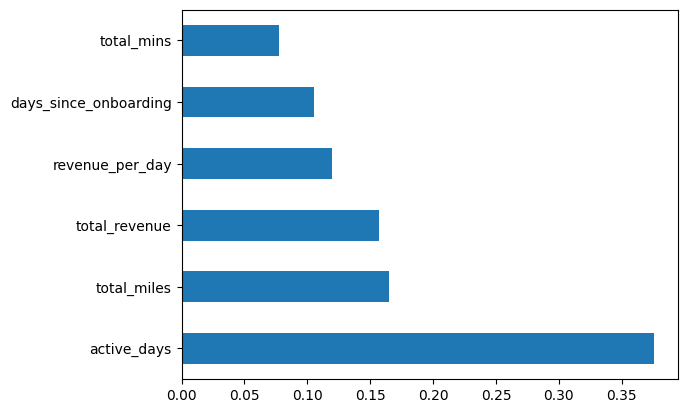

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()



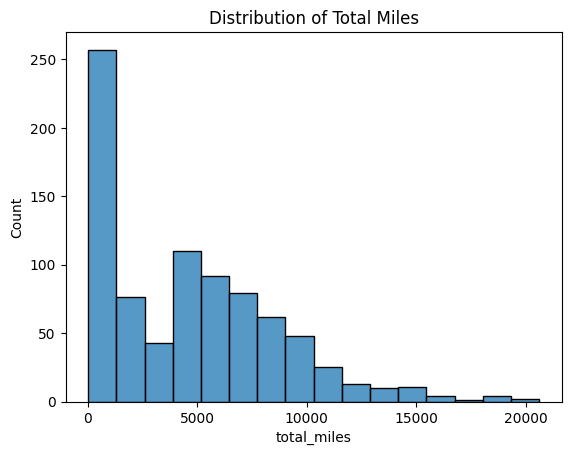

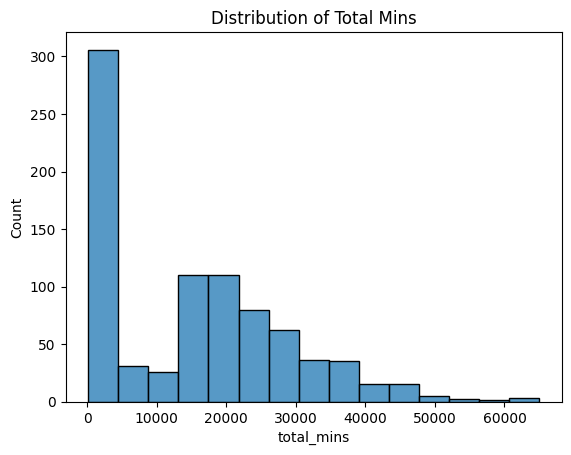

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


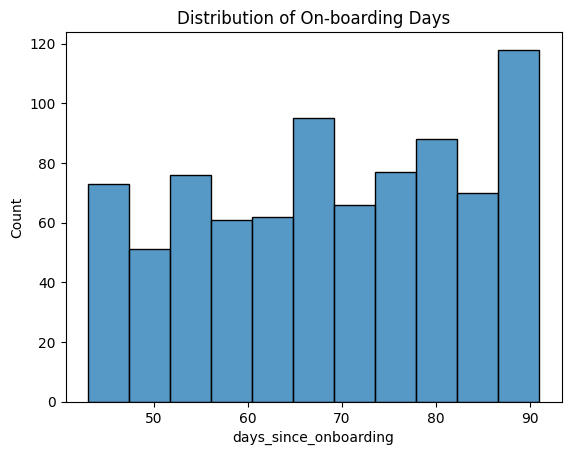

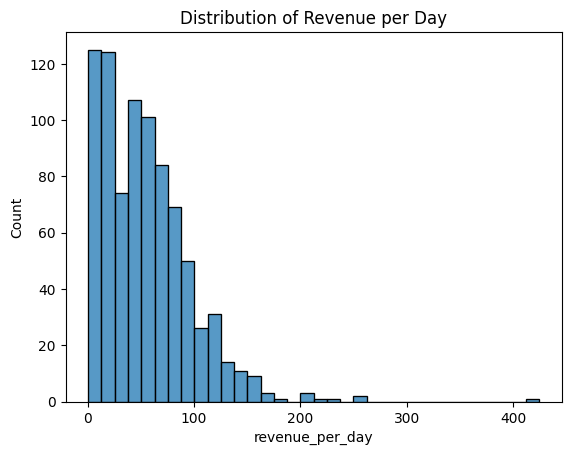

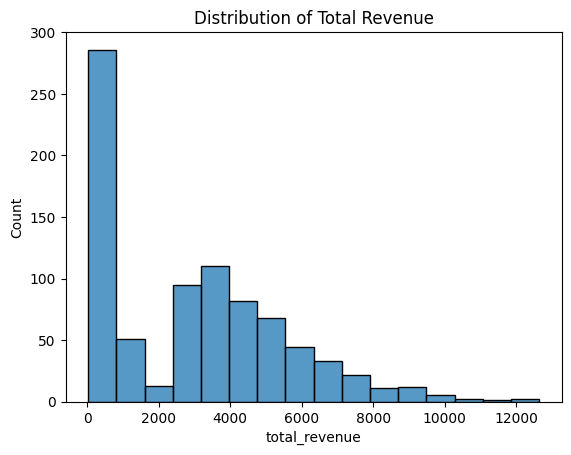

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


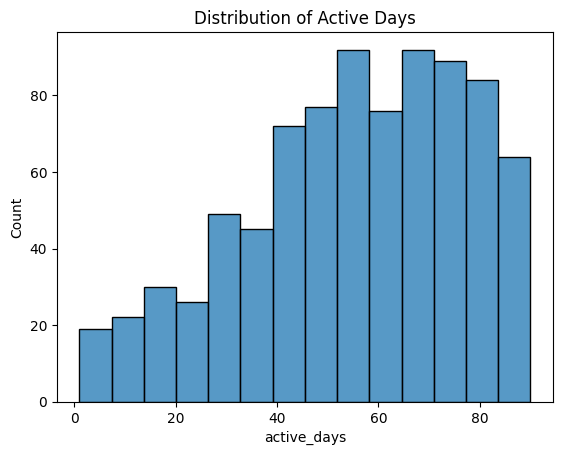

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Various distributions and relationships
sns.histplot(results['total_miles'])
plt.title('Distribution of Total Miles')
plt.show()

sns.histplot(results['total_mins'])
plt.title('Distribution of Total Mins')
plt.show()

sns.histplot(results['days_since_onboarding'])
plt.title('Distribution of On-boarding Days')
plt.show()

sns.histplot(results['revenue_per_day'])
plt.title('Distribution of Revenue per Day')
plt.show()

sns.histplot(results['total_revenue'])
plt.title('Distribution of Total Revenue')
plt.show()

sns.histplot(results['active_days'])
plt.title('Distribution of Active Days')
plt.show()

In [ ]:
# Calculate additional features
results['avg_miles_per_day'] = results['total_miles'] / results['active_days']
results['avg_revenue_per_min'] = results['total_revenue'] / results['total_mins']


In [ ]:
# Segment based on quantiles for example
quantiles = results[['avg_miles_per_day', 'avg_revenue_per_min','total_miles', 'total_mins', 'active_days', 'total_revenue', 'revenue_per_day', 'days_since_onboarding']].quantile([0.25, 0.5, 0.75])
print(quantiles)

# Define segments
results['avg_mileage_per_day_segment'] = pd.qcut(results['avg_miles_per_day'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['avg_revenue_per_min_segment'] = pd.qcut(results['avg_revenue_per_min'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['total_miles_segment'] = pd.qcut(results['total_miles'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['total_mins_segment'] = pd.qcut(results['total_mins'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['active_days_segment'] = pd.qcut(results['active_days'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['total_revenue_segment'] = pd.qcut(results['total_revenue'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['revenue_per_day_segment'] = pd.qcut(results['revenue_per_day'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])
results['days_since_onboarding_segment'] = pd.qcut(results['days_since_onboarding'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High', 'Very High'])


      avg_miles_per_day  avg_revenue_per_min  total_miles    total_mins  \
0.25          33.166985             0.183165  1053.267341   3196.916667   
0.50          73.949924             0.192608  4509.255172  15825.500000   
0.75         117.210377             0.204806  7182.570304  24008.083333   

      active_days  total_revenue  revenue_per_day  days_since_onboarding  
0.25         42.0     628.586675        19.225604                   58.0  
0.50         57.0    3032.228402        48.989803                   70.0  
0.75         73.0    4568.841818        77.984876                   82.0  


In [ ]:
# Churn rate by segment
mileage_churn_rate = results.groupby('avg_mileage_per_day_segment')['is_churned'].mean()
print(mileage_churn_rate)

revenue_churn_rate = results.groupby('avg_revenue_per_min_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('total_miles_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('total_mins_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('active_days_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('total_revenue_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('revenue_per_day_segment')['is_churned'].mean()
print(revenue_churn_rate)

revenue_churn_rate = results.groupby('days_since_onboarding_segment')['is_churned'].mean()
print(revenue_churn_rate)


avg_mileage_per_day_segment
Low          0.509524
Medium       0.358852
High         0.181818
Very High    0.177033
Name: is_churned, dtype: float64
avg_revenue_per_min_segment
Low          0.385714
Medium       0.200957
High         0.258373
Very High    0.382775
Name: is_churned, dtype: float64
total_miles_segment
Low          0.714286
Medium       0.363636
High         0.095694
Very High    0.052632
Name: is_churned, dtype: float64
total_mins_segment
Low          0.680952
Medium       0.392344
High         0.105263
Very High    0.047847
Name: is_churned, dtype: float64
active_days_segment
Low          0.906103
Medium       0.173913
High         0.120536
Very High    0.005181
Name: is_churned, dtype: float64
total_revenue_segment
Low          0.690476
Medium       0.373206
High         0.114833
Very High    0.047847
Name: is_churned, dtype: float64
revenue_per_day_segment
Low          0.476190
Medium       0.416268
High         0.148325
Very High    0.186603
Name: is_churned, dtype: 